# Machine Learning Project: Predicting seasonal flu vaccine uptake

## Contents:

1. Data preprocessing (missing data, feature engineering, categorical feature encoding)
2. Exploratory analysis
3. Train test splitting
5. Logistic regression
6. Random forest 
6. Neural network

## Import libraries

In [28]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

## Import data

In [29]:
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

X = pd.read_csv("training_set_features.csv")
Y = pd.read_csv("training_set_labels.csv")

Files in '/Users/camillacallierotti/OneDrive - Imperial College London/5 Machine Learning/project_flu_shot_prediction': ['decision_tree.png', '.DS_Store', 'images', 'training_set_labels.csv', 'project_script.docx', 'submission_format.csv', 'flu_shot_prediction.ipynb', 'extra info', 'random forest papers', 'training_set_features.csv', 'project_ppt.pptx', '.ipynb_checkpoints', 'test_set_features.csv']


## 1. Data preprocessing

In [30]:
# Explore data structure

print('Dimensions of X:', X.shape)
print('Dimensions of Y:', Y.shape)
X.info()

Dimensions of X: (26707, 36)
Dimensions of Y: (26707, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condi

In [31]:
pd.set_option('display.max_columns', None)
X.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [12]:
# Merge X and Y

Z = Y
Z.drop('respondent_id',axis = 1,inplace = True)
frames = [X,Z]
data = pd.concat(frames,axis=1)

In [13]:
# Remove H1N1 vaccine features

data.drop(['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','h1n1_concern','h1n1_knowledge',
          'doctor_recc_h1n1','h1n1_vaccine',],axis=1,inplace = True)

In [14]:
data.shape

(26707, 31)

In [ ]:
# Check missingness

data.isnull().sum()

# Drop features where half the observations are null
data.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace = True)

# Drop features containing gibberish
data.drop(['hhs_geo_region'],axis=1,inplace=True)

# Check that columns are removed
print('Resulting dimensions of data:', data.shape)
#print('Remaning columns:', data.columns)

# For remaining nulls, impute mode for categorical features and means for numerical features

for col in data.columns:
    if data[col].isnull().sum() and data[col].dtypes != 'object':
        data[col].loc[(X[col].isnull())] = data[col].median()
for col in data.columns:
    if data[col].isnull().sum() and data[col].dtypes == 'object':
        data[col].loc[(data[col].isnull())] = data[col].mode().max()
        
# Check 

#data.isnull().sum()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   behavioral_antiviral_meds    26707 non-null  float64
 2   behavioral_avoidance         26707 non-null  float64
 3   behavioral_face_mask         26707 non-null  float64
 4   behavioral_wash_hands        26707 non-null  float64
 5   behavioral_large_gatherings  26707 non-null  float64
 6   behavioral_outside_home      26707 non-null  float64
 7   behavioral_touch_face        26707 non-null  float64
 8   doctor_recc_seasonal         26707 non-null  float64
 9   chronic_med_condition        26707 non-null  float64
 10  child_under_6_months         26707 non-null  float64
 11  health_worker                26707 non-null  float64
 12  opinion_seas_vacc_effective  26707 non-null  float64
 13  opinion_seas_ris

### Label encoding

Label encoding categorical features in hierarchy

In [23]:
# view categorical columns

str_cols = data.select_dtypes(include = 'object').columns
data[str_cols].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


In [24]:
# label encoding

LE = LabelEncoder()
for col in str_cols:
    data[col] = LE.fit_transform(data[col])

In [25]:
# check label encoding

data[str_cols].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,3,1,3,0,2,1,0,1,2
1,1,0,3,1,2,1,1,0,0
2,0,2,3,1,0,1,0,0,0
3,4,0,3,0,2,1,1,1,1
4,2,3,3,0,0,0,0,0,0


## One hot encoding
One hot encoding features not in hierarchy (race, sex, marital status, rent or own)

In [26]:
# columns that need one hot encoding

ohe_cols = data[['race','sex','marital_status','rent_or_own']]
ohe_cols.head()

,race,sex,marital_status,rent_or_own
0,3,0,1,0
1,3,1,1,1
2,3,1,1,0
3,3,0,1,1
4,3,0,0,0


In [27]:
OHE = OneHotEncoder(sparse=False)
data[ohe_cols] = data[ohe_cols].reshape(len(data[ohe_cols]), 1)
for col in ohe_cols:
    data[ohe_cols] = OHE.fit_transform(data[col])

ValueError: Boolean array expected for the condition, not int64

### Feature engineering
Create cleanliness and opinions variables

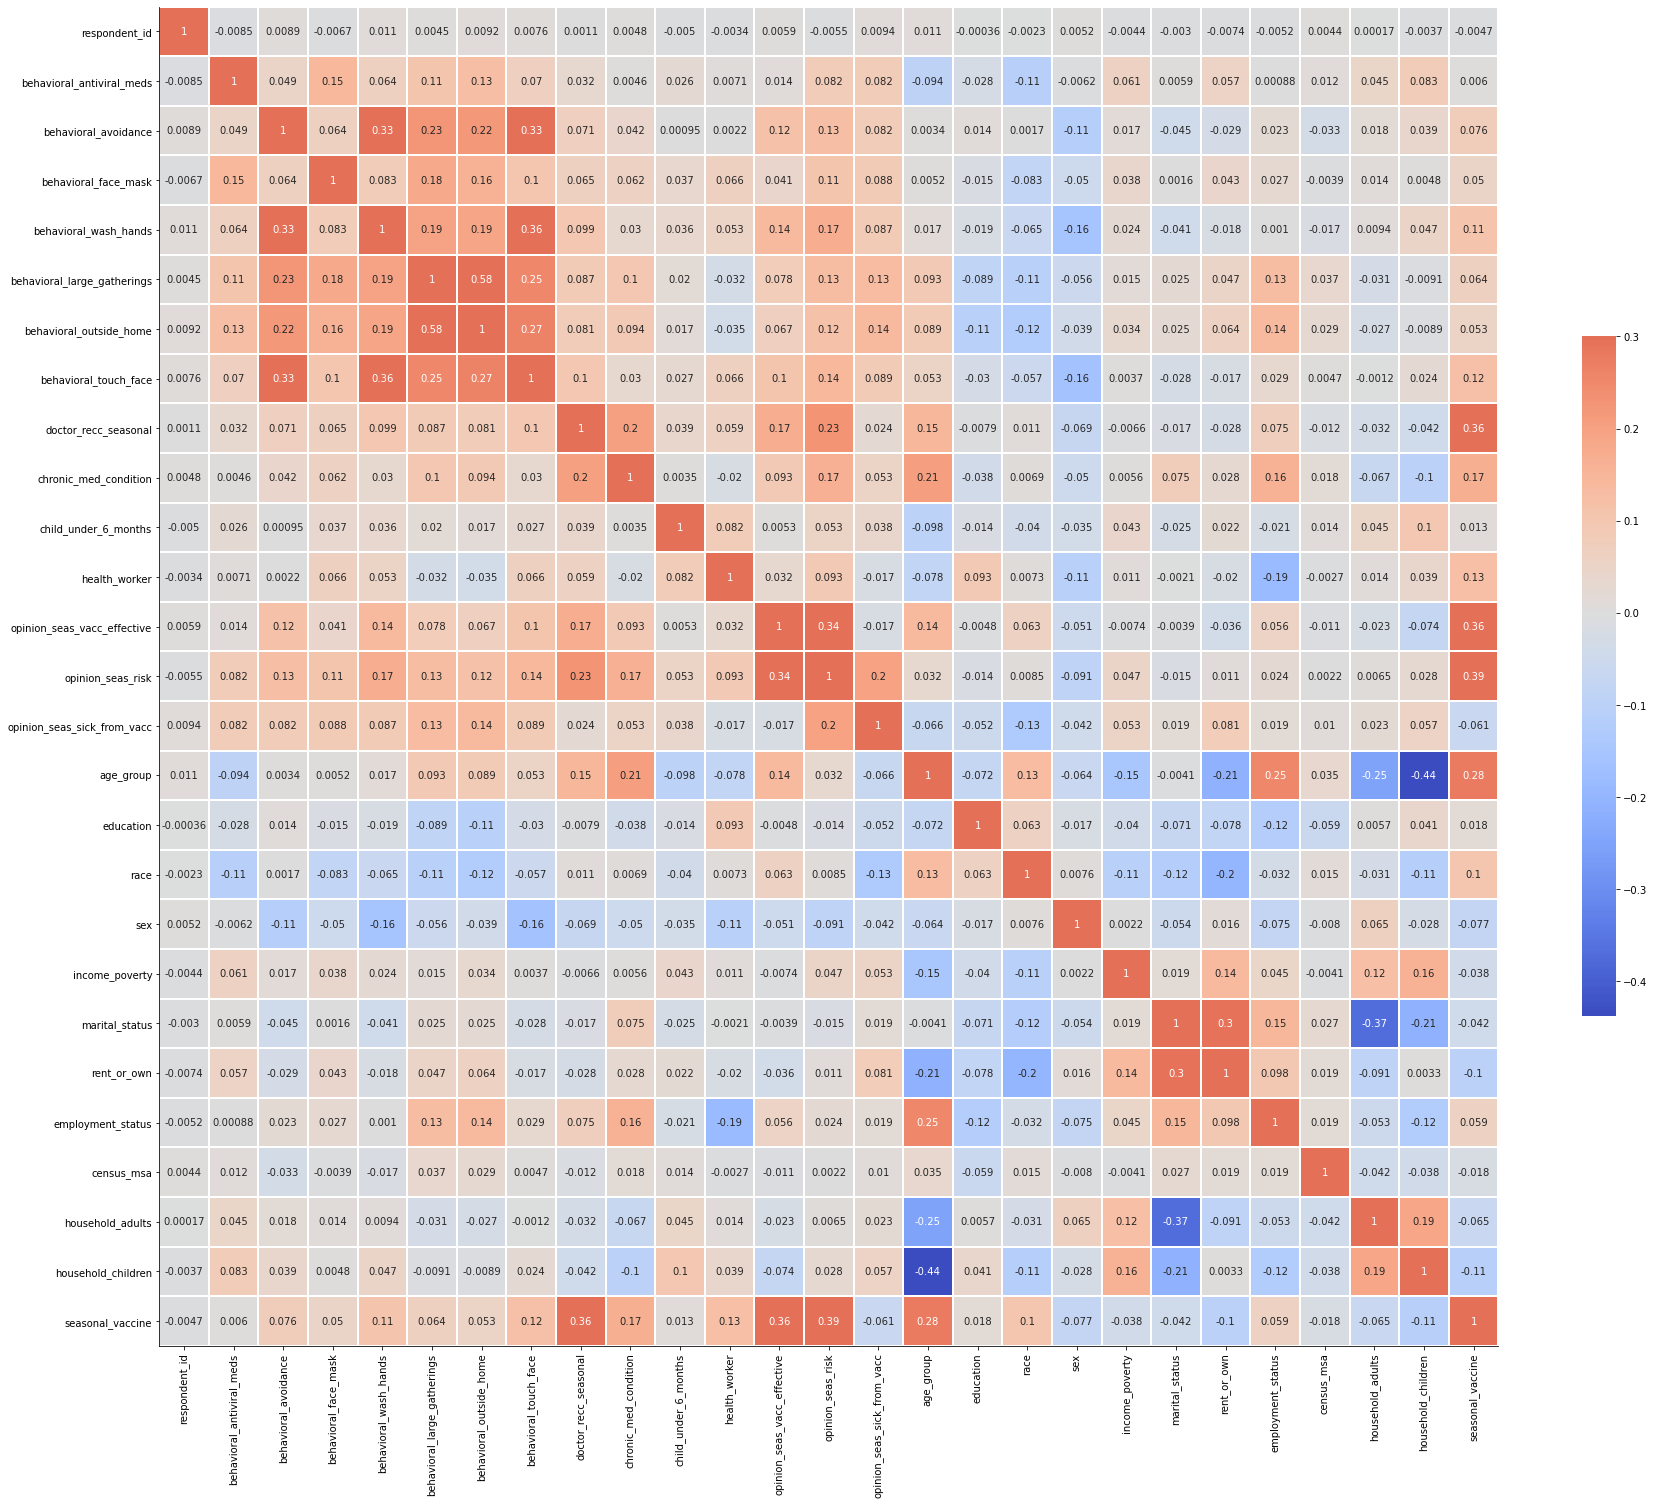

In [553]:
# Heatmap (before collinearity removed)

corr = data.corr()
heatmap = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
sns.despine()
heatmap.figure.set_size_inches(30,25)
    
plt.show()

In [555]:
# merge all behavioural features into one because they are collinear

data['cleanliness'] =  data['behavioral_antiviral_meds']+ data['behavioral_avoidance']+\
                        data['behavioral_face_mask']+data['behavioral_wash_hands']+\
                       data['behavioral_large_gatherings'] + data['behavioral_outside_home']+\
                       data['behavioral_touch_face']

In [556]:
# check

data['cleanliness']

0        2.0
1        4.0
2        1.0
3        3.0
4        4.0
        ... 
26702    2.0
26703    2.0
26704    5.0
26705    1.0
26706    1.0
Name: cleanliness, Length: 26707, dtype: float64

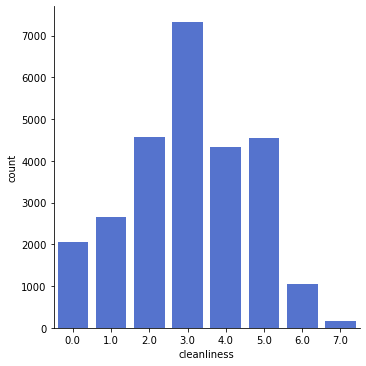

In [557]:
# distribution of new cleanliness variable

sns.color_palette()
sns.catplot('cleanliness',kind = 'count',data = data,color = 'royalblue')

In [558]:
# merge all opinion features into one because of collinearity between them

data['opinion_seasonal'] = data['opinion_seas_vacc_effective']+\
                  data['opinion_seas_risk'] - data['opinion_seas_sick_from_vacc']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


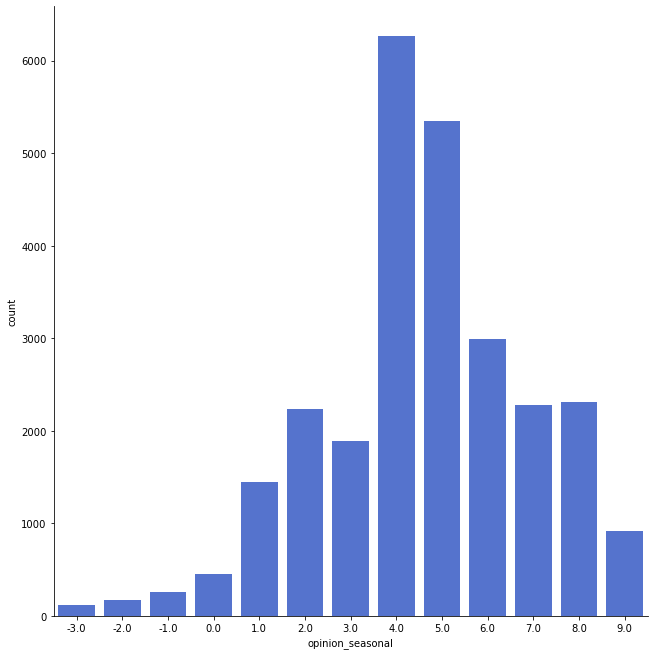

In [559]:
sns.catplot('opinion_seasonal',kind = 'count',data = data,size=9,color = 'royalblue')

In [560]:
# Remove redundant features included in the new features

data.drop(['opinion_seas_sick_from_vacc','behavioral_antiviral_meds',
           'behavioral_large_gatherings','behavioral_outside_home','behavioral_antiviral_meds',
           'behavioral_avoidance','behavioral_face_mask'],axis=1,inplace = True)

In [561]:
data.columns

Index(['respondent_id', 'behavioral_wash_hands', 'behavioral_touch_face',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'census_msa',
       'household_adults', 'household_children', 'seasonal_vaccine',
       'cleanliness', 'opinion_seasonal'],
      dtype='object')

In [562]:
data.shape

(26707, 23)

## 2. Exploratory analysis

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


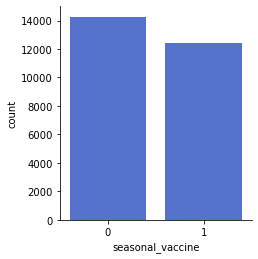

In [521]:
# Distribution of outcome variable

sns.factorplot('seasonal_vaccine',data=Y,kind='count',size = 3.5, color = 'royalblue')

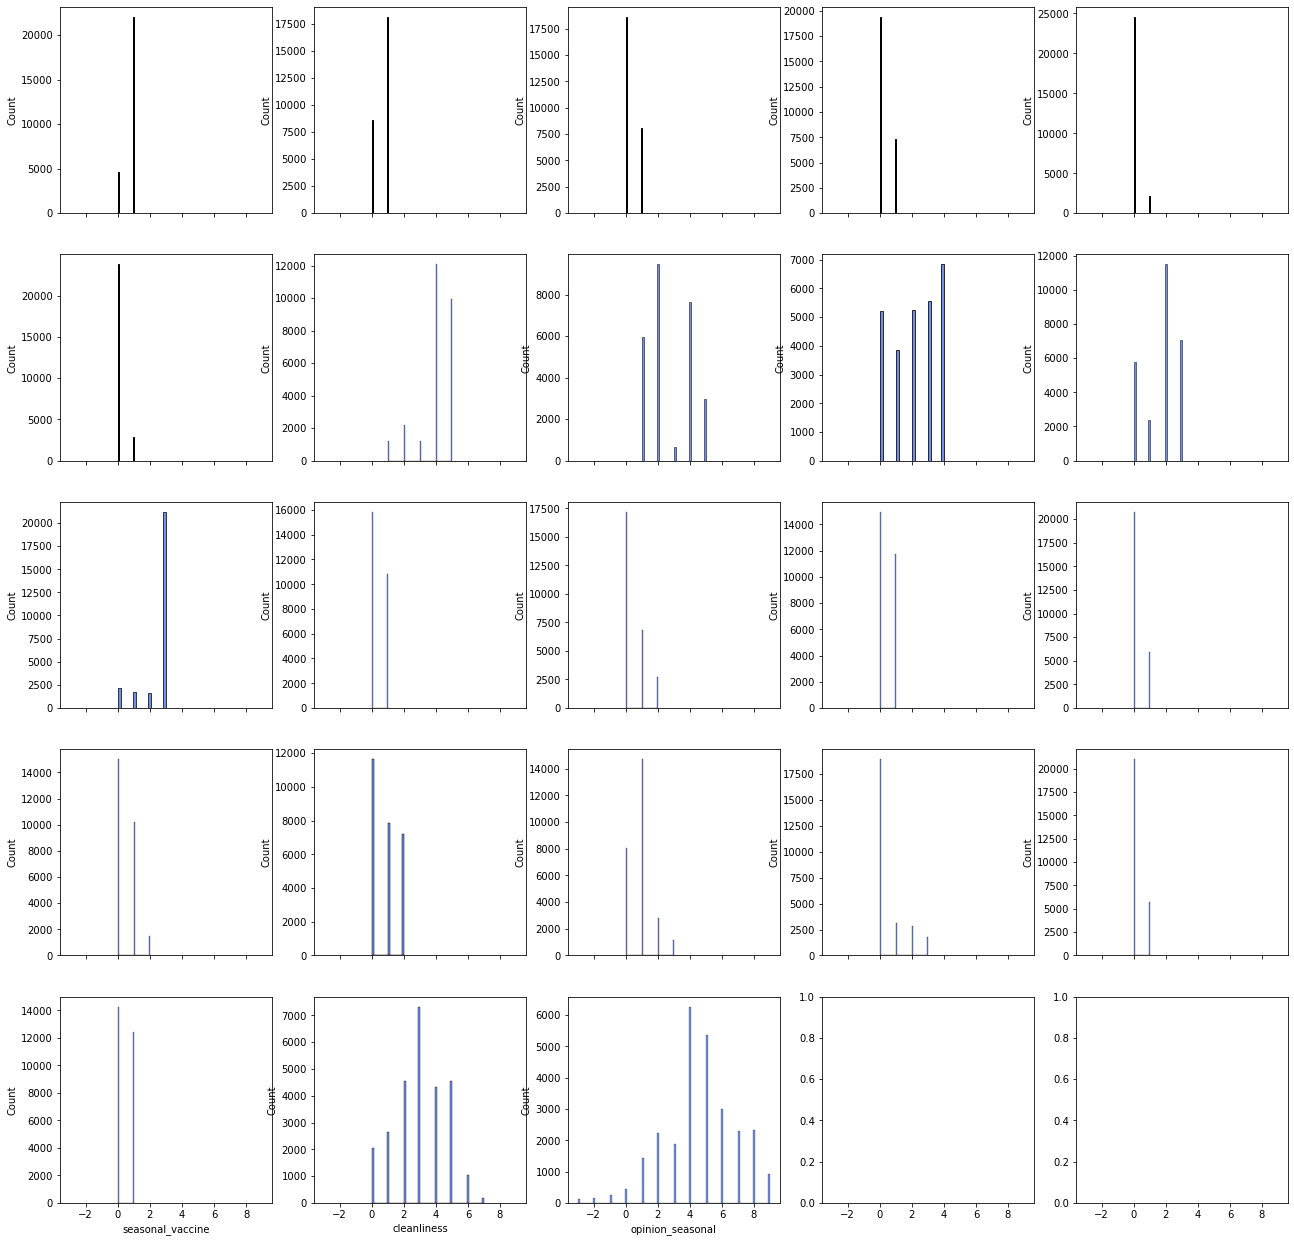

In [522]:
# Distribution of all predictor variables

f, axes = plt.subplots(5, 5, figsize=(22, 22), sharex=True)
for ax, feature in zip(axes.flat, data.columns):
    sns.histplot(data[feature] , color="royalblue", ax=ax)

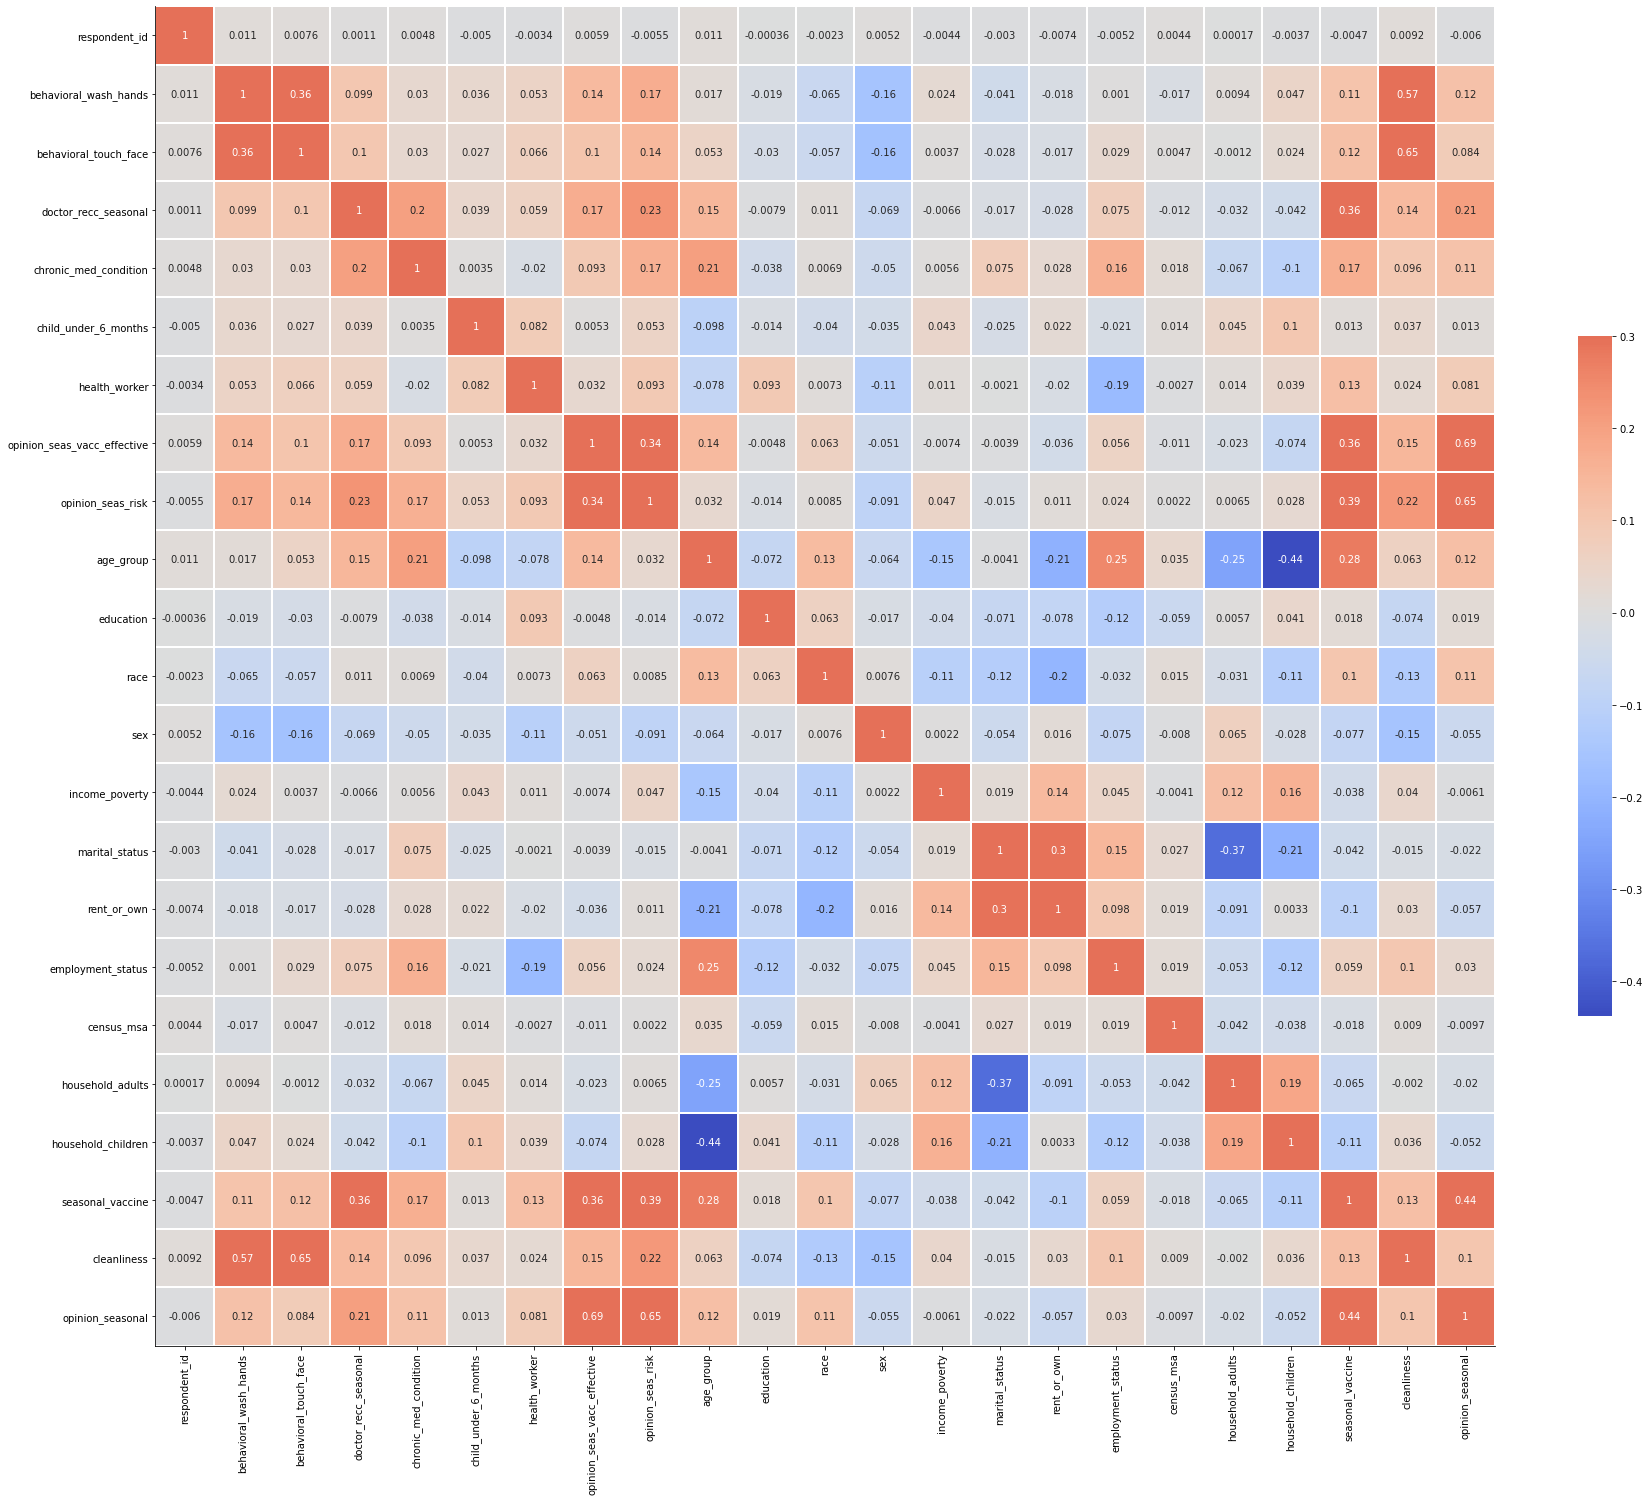

In [563]:
# Heatmap (after collinearity removed)

corr = data.corr()
heatmap = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
sns.despine()
heatmap.figure.set_size_inches(30,25)
    
plt.show()

In [157]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,cleanliness,opinion_h1n1,opinion_seasonal
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,2,0.0,0.0,0,0,2.0,2.0,1.0
1,1,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0.0,0.0,0,1,4.0,5.0,2.0
2,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,2.0,0.0,0,0,1.0,3.0,3.0
3,3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,1,1,0.0,0.0,0,1,3.0,1.0,8.0
4,4,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1.0,0.0,0,0,4.0,4.0,0.0


In [294]:
data.columns

Index(['behavioral_wash_hands', 'behavioral_touch_face',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine', 'cleanliness', 'opinion_seasonal'],
      dtype='object')

In [185]:
data.shape

(26707, 29)

## 3. Data Splitting

In [564]:
features = ['behavioral_wash_hands', 'behavioral_touch_face',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'census_msa',
       'household_adults', 'household_children', 'cleanliness', 'opinion_seasonal'] # all columns minus the  vaccine response variable
labels = ['seasonal_vaccine'] # vaccine response variable

train, test = train_test_split(data,test_size = 0.2, shuffle = True)
X_train, y_train = train[features], train[labels]
X_test, y_test = test[features], test[labels]

In [565]:
# check

X_train.head()

,behavioral_wash_hands,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,age_group,education,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,cleanliness,opinion_seasonal
13305,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0,2,...,0,0,1,1,0,1,1.0,0.0,1.0,7.0
12036,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,0,2,...,1,0,1,1,1,1,1.0,0.0,0.0,5.0
12774,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,2,2,...,0,0,1,0,0,2,1.0,0.0,6.0,4.0
6900,1.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,1,2,...,0,1,0,0,0,1,1.0,2.0,2.0,8.0
26246,1.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,3,2,...,1,1,0,0,0,0,1.0,0.0,3.0,5.0


In [566]:
y_train.head()

,seasonal_vaccine
13305,1
12036,0
12774,1
6900,1
26246,1


## 5. Logistic regression

In [567]:
from sklearn.linear_model import LogisticRegression

In [603]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)

### ROC curve

In [598]:
from sklearn.metrics import roc_curve

In [604]:
y_prob = logreg.predict_proba(X_test) # predict probabilities
y_prob = y_prob[:,1] # keep probs for positive outcome only

In [605]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

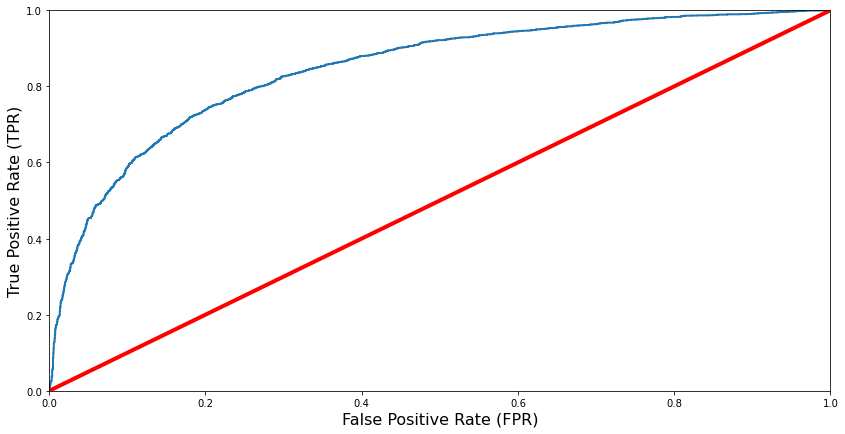

In [606]:
# plotting FP against TP
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [607]:
# AUC score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8452944478292265


### Confusion matrix

In [574]:
logreg_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print(rf_confusion_matrix)

[[1746  697]
 [ 503 2396]]


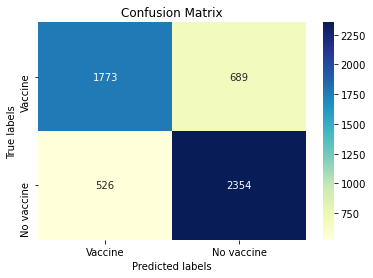

In [575]:
ax= plt.subplot()
sns.heatmap(logreg_confusion_matrix, annot=True, fmt='g', ax=ax, cmap="YlGnBu");

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Vaccine', 'No vaccine']); ax.yaxis.set_ticklabels(['Vaccine', 'No vaccine']);

## 6. Decision tree

In [422]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [416]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [418]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## 7. Random forest

In [330]:
from sklearn.ensemble import RandomForestClassifier

In [608]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, y_train.values.ravel())
y_pred = random_forest.predict(X_test)

In [577]:
# parameters currently in use

from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### Hyperparameter tuning

In [359]:
# create a parameter grid to sample from during fitting:

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [361]:
# instantiate the random search and fit it like any Scikit-Learn model:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 78.2min finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [362]:
# view best parameters:

rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [366]:
# fit random forest with best hyperparameters

random_forest_best = RandomForestClassifier(n_estimators=1600, 
                                            min_samples_split=2,
                                            min_samples_leaf=4,
                                            max_features='sqrt',
                                            max_depth=10,
                                            bootstrap=True,
                                            oob_score=True)
random_forest_best.fit(X_train, y_train.values.ravel())
y_pred = random_forest_best.predict(X_test)

### Feature importance plot

In [609]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head()

,importance
feature,
opinion_seasonal,0.135
opinion_seas_risk,0.092
age_group,0.088
cleanliness,0.080
opinion_seas_vacc_effective,0.079


<AxesSubplot:xlabel='feature'>

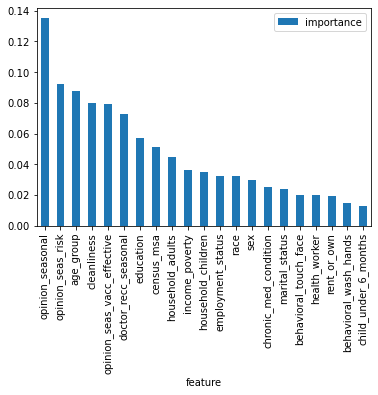

In [610]:
importances.plot.bar()

### ROC curve

In [611]:
y_prob = random_forest.predict_proba(X_test) # predict probabilities
y_prob = y_prob[:,1] # keep probs for positive outcome only

In [612]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

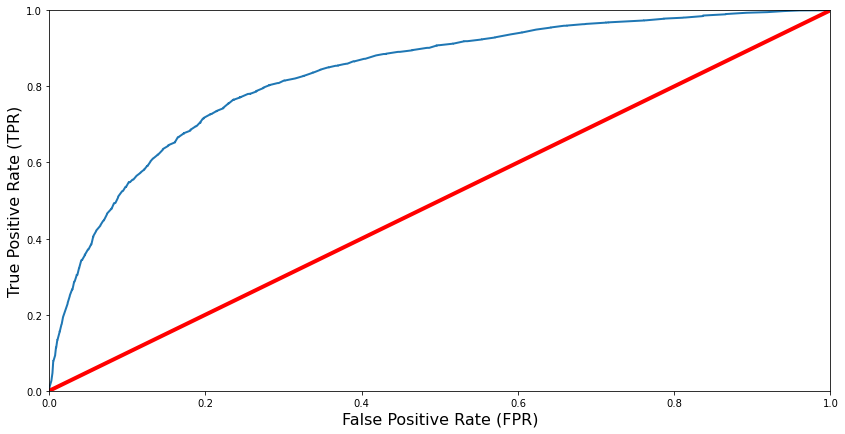

In [613]:
# plotting FP against TP
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [614]:
# AUC score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8321716479375395


### Confusion matrix

In [388]:
from sklearn.metrics import plot_confusion_matrix

In [400]:
y_test.head()

,seasonal_vaccine
23914,0
5065,1
4451,0
389,1
22355,0


In [583]:
rf_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print(rf_confusion_matrix)

[[1756  706]
 [ 572 2308]]


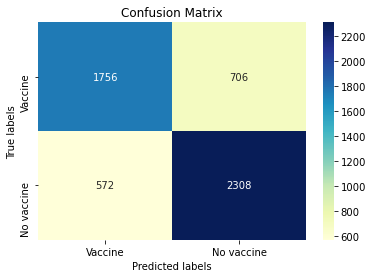

In [584]:
ax= plt.subplot()
sns.heatmap(rf_confusion_matrix, annot=True, fmt='g', ax=ax, cmap="YlGnBu");

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Vaccine', 'No vaccine']); ax.yaxis.set_ticklabels(['Vaccine', 'No vaccine']);

### Visualising a single decision tree

In [356]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

ModuleNotFoundError: No module named 'pydot'

### Hyperparameter tuning

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
              "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100,
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)
clf = GridSearchCV(estimator=rf,
                   param_grid=param_grid,
                   n_jobs=-1)
clf.fit(X_train, y_train)
clf.bestparams

## 7. Neural network

Method:
1. Define keras model: we create a SEQUENTIAL model in which we add layers one at a time until we are happy with the network architecture
2. Compile keras model: this automatically chooses the best way to represent the network for training. here we specify the loss function to evaluate the weights and the optimiser used to search through the weights
3. Fit the keras model: training occurs over epochs (=number of iterations through all rows of X_train) and each epoch is split into batches (=samples considered by the model within an epoch before weights are updated), therefore each epoch contains one or more batches
4. Tuning hyperparameters using random search rather than grid search. With grid search the number of unique combinations of models tested is (number of parameters)^(number of potential values for each parameter)

NN hyperparameters:
- Learning rate
- Dropout rate
- Batch size

In [472]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [591]:
# function to create model for KerasClassifier
def DL_Model():
    # define model:
    model = Sequential()
    model.add(Dense(15, input_dim= 21, activation= 'relu')) # 21 parameters in data
    model.add(Dense(15, activation= 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model:
    model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=DL_Model)

### optimise batch size and epochs

In [592]:
# define grid search parameters
batchSize = [10,20,40,60,80,100]
epochs = [10,30,50]

parameter_grid = dict(batch_size=batchSize, epochs=epochs)

clf = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
clf_result = clf.fit(X_train, y_train)

print('Best: %f using %s' %(clf_result.best_score_, clf_result.best_params_))

KeyboardInterrupt: 

### optimise optimisation algorithm

In [484]:
# function to create model for KerasClassifier
def DL_Model(optimizer='adam'):
    # define model:
    model = Sequential()
    model.add(Dense(15, input_dim= 21, activation= 'relu')) # 21 parameters in data
    model.add(Dense(15, activation= 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model:
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

# create model 
model = KerasClassifier(build_fn=DL_Model, epochs=50, batch_size=10)

In [485]:
# define grid seach parameters
optimizer = ['SGD', 'Adadelta', 'RMSprop', 'Adagrad', 'Adam']
parameter_grid = dict(optimizer=optimizer)

In [593]:
clf = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
clf_result = clf.fit(X_train, y_train)

print('Best: %f using %s' %(clf_result.best_score_, clf_result.best_params_))

KeyboardInterrupt: 

### make predicions and performance

In [594]:
y_prob = clf_result.predict_proba(X_test) # predict probabilities
y_prob = y_prob[:,1] # keep probs for positive outcome only

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [595]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

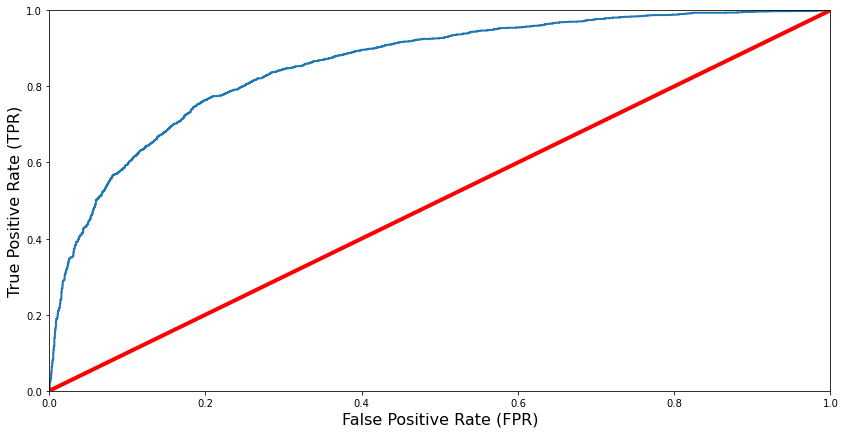

In [596]:
# plotting FP against TP
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [496]:
# AUC score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8502269827259868


### Confusion matrix

In [388]:
from sklearn.metrics import plot_confusion_matrix

In [497]:
y_pred = clf.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [400]:
y_test.head()

,seasonal_vaccine
23914,0
5065,1
4451,0
389,1
22355,0


In [498]:
rf_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print(rf_confusion_matrix)

[[1746  697]
 [ 503 2396]]


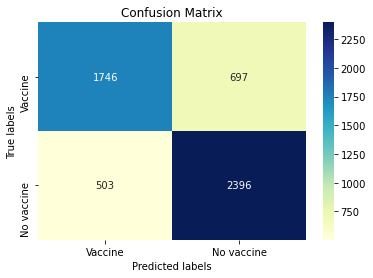

In [499]:
ax= plt.subplot()
sns.heatmap(rf_confusion_matrix, annot=True, fmt='g', ax=ax, cmap="YlGnBu");

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Vaccine', 'No vaccine']); ax.yaxis.set_ticklabels(['Vaccine', 'No vaccine']);